In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnist-in-csv/mnist_test.csv
/kaggle/input/mnist-in-csv/mnist_train.csv


## Visualising Clusters From MNIST Dataset  <a class="anchor"  id="heading_"></a>

* [1.Loading The Dataset](#import)
* [2.Reducing the dimensionality to 2 using t-SNE](reduce)
* [3.Visualisation ](#viz)
    * [Improving Visualisation](#improve)

Our Approach for this project is going to be really simple. We will be using the MNIST dataset which can be found here https://www.kaggle.com/datasets/oddrationale/mnist-in-csv/code?datasetId=27352 .

1.The dataset is already split into test and train sets.In this project,we will be working on only the train set.

2.We first apply t-SNE to reduce the train-set to 2 dimensions only.

3.Next, we use matplotlib for visualisation.

## 1. Loading the dataset <a class="anchor"  id="import"></a>

In [2]:
data=pd.read_csv("/kaggle/input/mnist-in-csv/mnist_train.csv")

In [3]:
y=data["label"]
X=data.drop("label",axis=1)

## 2.Reducing the dimensionality to 2 using t-SNE <a class="anchor"  id="reduce"></a>

In [4]:
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2,verbose=3,random_state=42,n_jobs=-1)

In [5]:
X_reduced=tsne.fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 60000 samples in 0.173s...
[t-SNE] Computed neighbors for 60000 samples in 108.027s...
[t-SNE] Computed conditional probabilities for sample 1000 / 60000
[t-SNE] Computed conditional probabilities for sample 2000 / 60000
[t-SNE] Computed conditional probabilities for sample 3000 / 60000
[t-SNE] Computed conditional probabilities for sample 4000 / 60000
[t-SNE] Computed conditional probabilities for sample 5000 / 60000
[t-SNE] Computed conditional probabilities for sample 6000 / 60000
[t-SNE] Computed conditional probabilities for sample 7000 / 60000
[t-SNE] Computed conditional probabilities for sample 8000 / 60000
[t-SNE] Computed conditional probabilities for sample 9000 / 60000
[t-SNE] Computed conditional probabilities for sample 10000 / 60000
[t-SNE] Computed conditional probabilities for sample 11000 / 60000
[t-SNE] Computed conditional probabilities for sample 12000 / 60000
[t-SNE] Computed conditional probabilities for s

In [6]:
X_reduced.shape

(60000, 2)

In [7]:
X_reduced

array([[ 36.826416  ,   0.5522586 ],
       [ 73.2857    , -39.952625  ],
       [ 29.385609  ,  72.35367   ],
       ...,
       [ 32.61926   ,   0.20795162],
       [ 64.795044  ,  52.704617  ],
       [-41.793343  , -11.542054  ]], dtype=float32)

## 3.Visualization <a class="anchor"  id="viz"></a>

In [8]:
import matplotlib.pyplot as mpl
import matplotlib.pyplot as plt

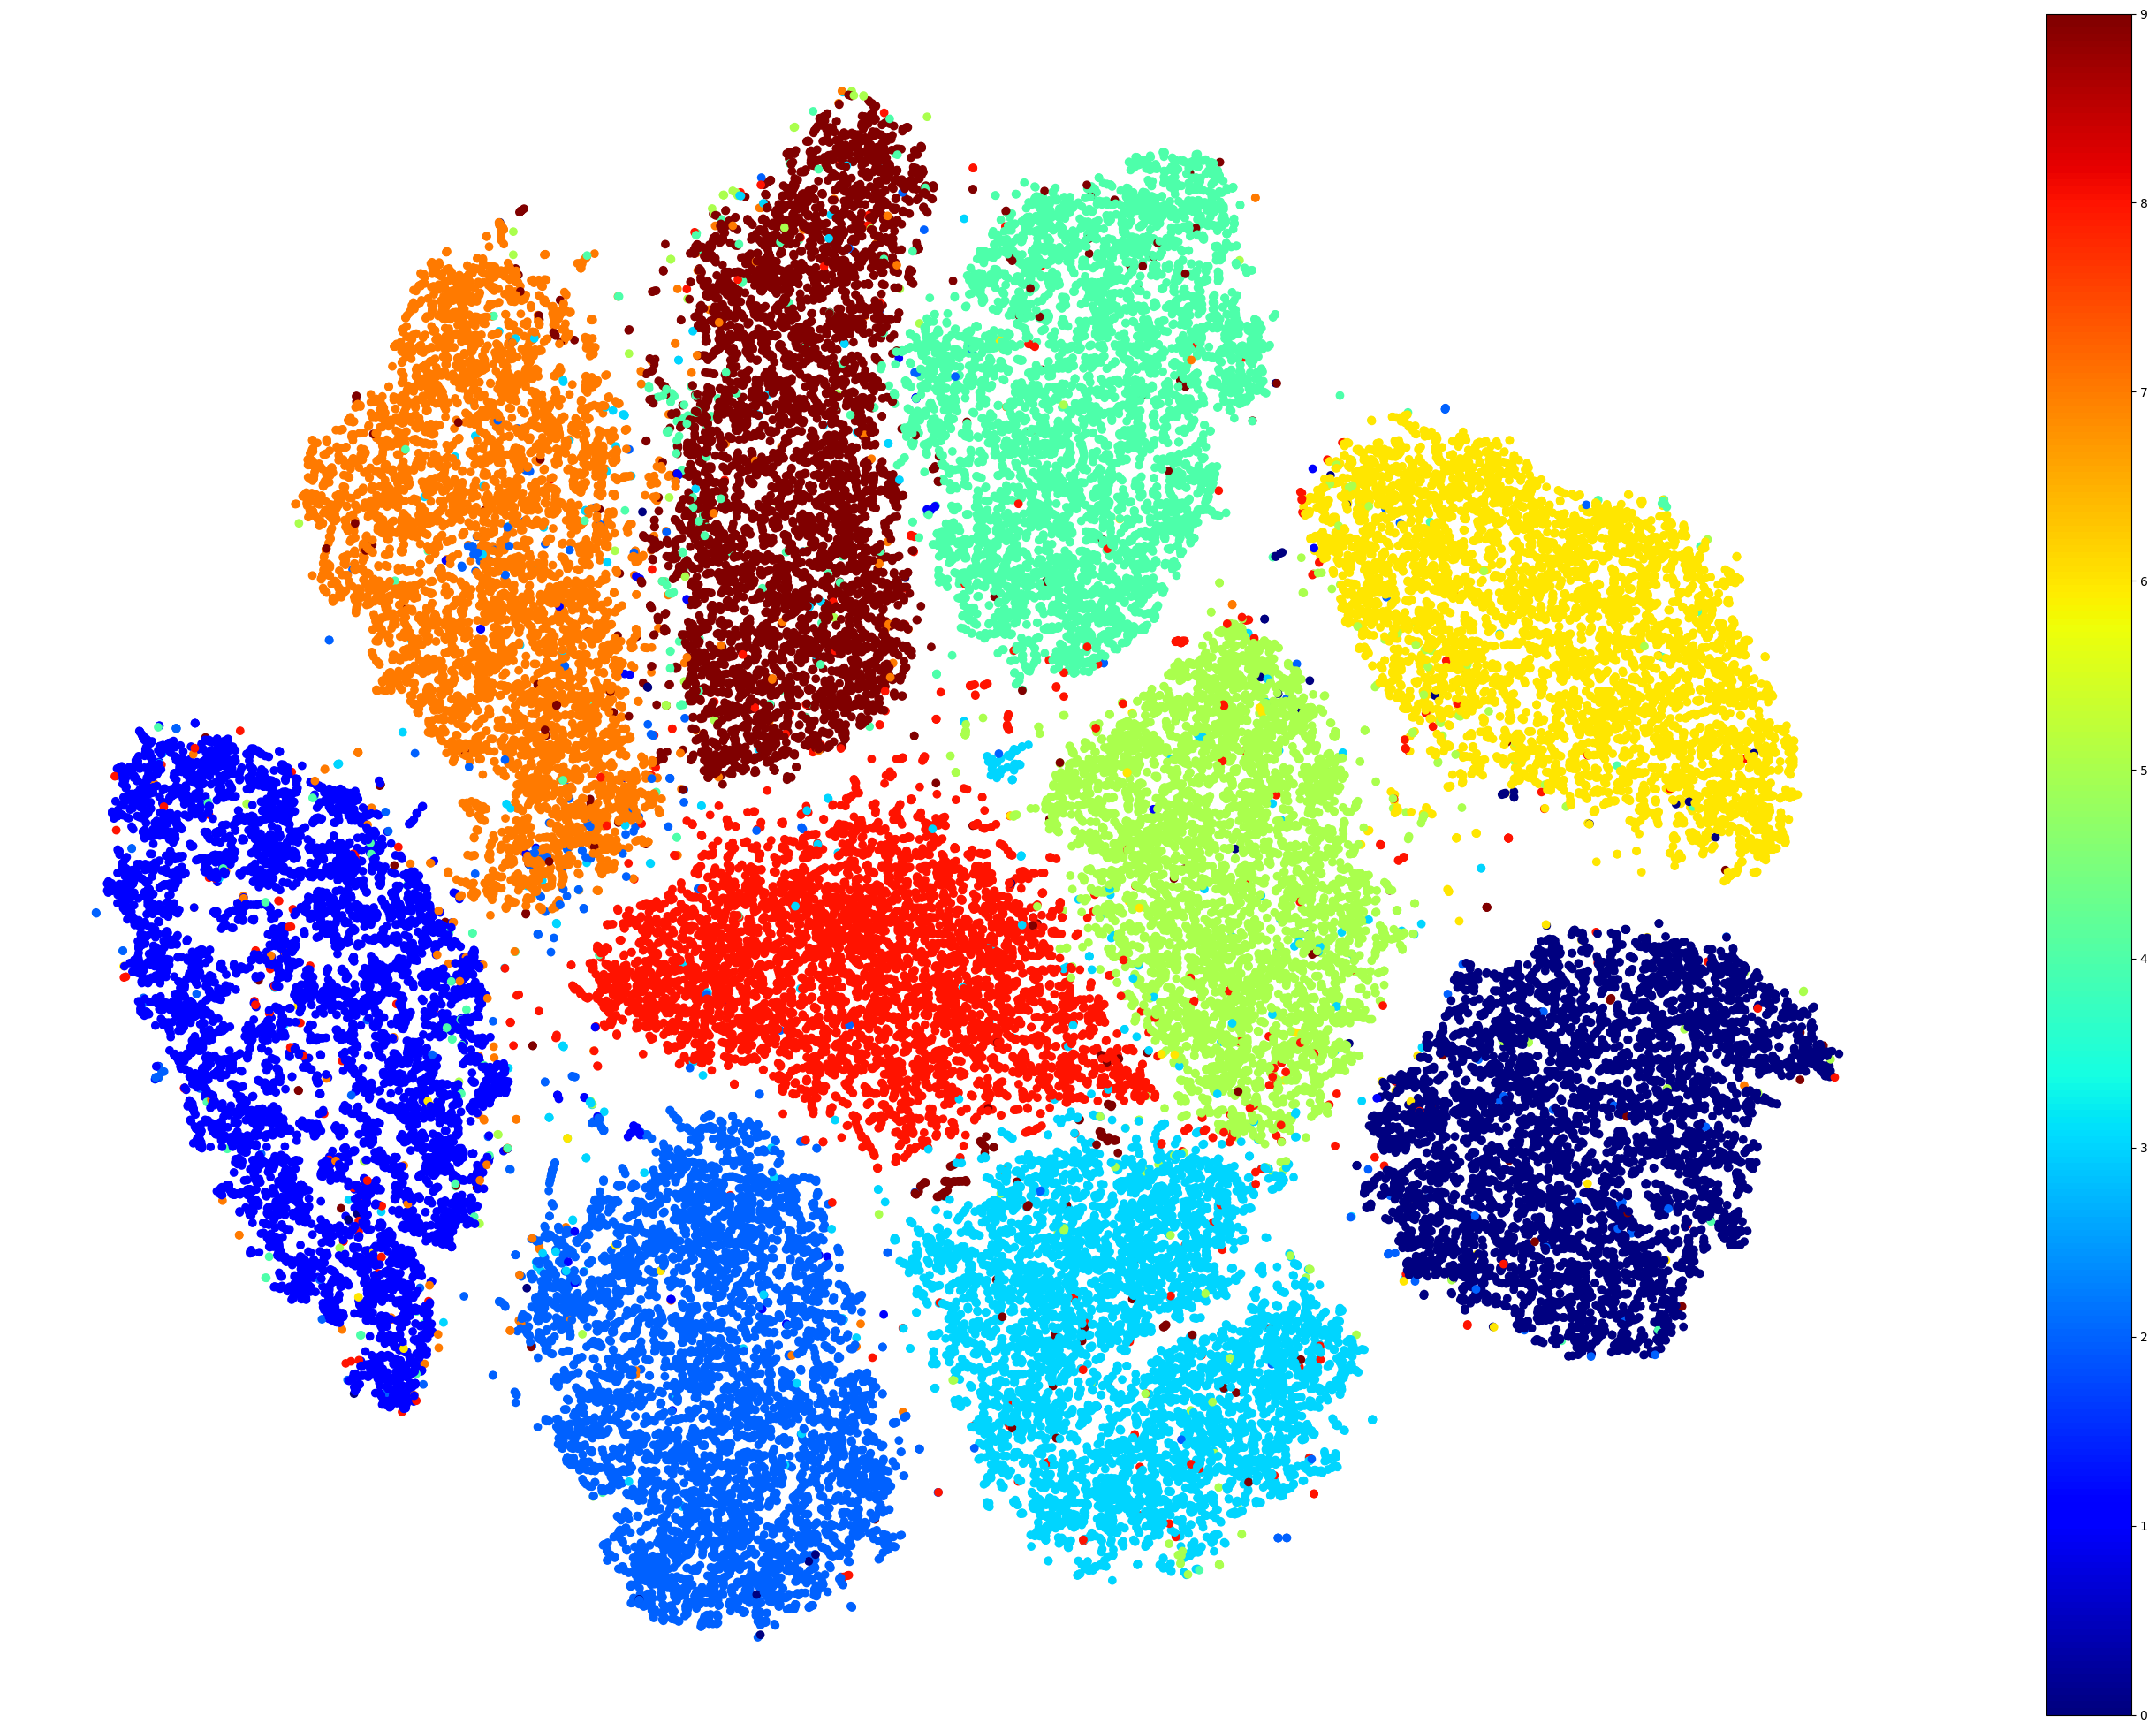

In [9]:
plt.figure(figsize=(35,25))
plt.scatter(X_reduced[:,0],X_reduced[:,1],c=y,cmap="jet")
plt.axis("off")
plt.colorbar()
plt.show()

Here we can identify 10 large clusters for sure, but there is quite a significant amount of overlap among few clusters. Most digits can be easily distinguished(0,1,4,6,7,8,9) and in their case the overlap is minimal but in case of 2,3 and 5,the overlap is quite significant. Let us check for these digits by running by plottiing their instances only.

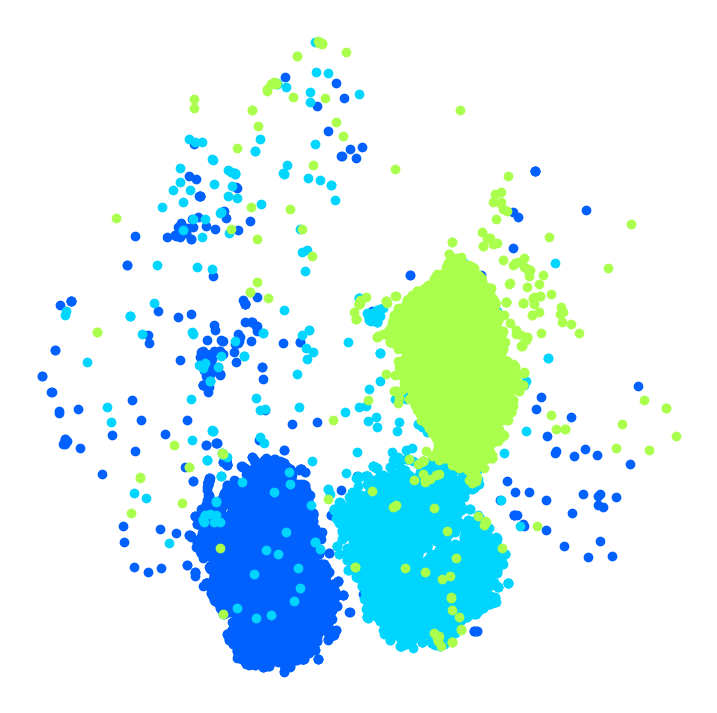

In [10]:
plt.figure(figsize=(9,9))
cmap = mpl.colormaps.get_cmap("jet")
for digit in (2, 3, 5):
    plt.scatter(X_reduced[y == digit, 0], X_reduced[y == digit, 1], c=[cmap(digit / 9)])
plt.axis('off')
plt.show()

This is definitely not good because of overlaps.There might be room for improvement.
We try to run t-SNE for these 3 digits exclusively and see what follows.

## Improving Visualization <a class="anchor"  id="improve"></a>

Let's run t-SNE for these 3 digits(2,3 and 5) exclusively now.

In [11]:
idx = (y == 2) | (y == 3) | (y == 5) 
X_235 = X[idx]
y_235 = y[idx]

tsne_235 = TSNE(n_components=2,verbose=3,random_state=42)
X_subset_reduced = tsne_235.fit_transform(X_235)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 17510 samples in 0.049s...
[t-SNE] Computed neighbors for 17510 samples in 10.152s...
[t-SNE] Computed conditional probabilities for sample 1000 / 17510
[t-SNE] Computed conditional probabilities for sample 2000 / 17510
[t-SNE] Computed conditional probabilities for sample 3000 / 17510
[t-SNE] Computed conditional probabilities for sample 4000 / 17510
[t-SNE] Computed conditional probabilities for sample 5000 / 17510
[t-SNE] Computed conditional probabilities for sample 6000 / 17510
[t-SNE] Computed conditional probabilities for sample 7000 / 17510
[t-SNE] Computed conditional probabilities for sample 8000 / 17510
[t-SNE] Computed conditional probabilities for sample 9000 / 17510
[t-SNE] Computed conditional probabilities for sample 10000 / 17510
[t-SNE] Computed conditional probabilities for sample 11000 / 17510
[t-SNE] Computed conditional probabilities for sample 12000 / 17510
[t-SNE] Computed conditional probabilities for sa

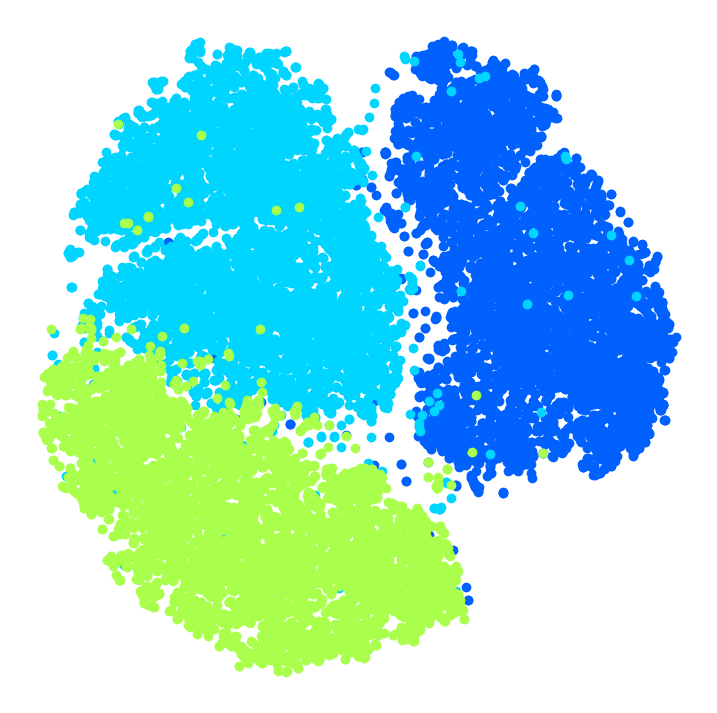

In [12]:
plt.figure(figsize=(9,9))
cmap = mpl.colormaps.get_cmap("jet")
for digit in (2, 3, 5):
    plt.scatter(X_subset_reduced[y_235 == digit, 0], X_subset_reduced[y_235 == digit, 1], c=[cmap(digit / 9)])
plt.axis('off')
plt.show()

Okay, this is not perfectly but definitely much better now.However,still some 3's and few 2's are scattered around. Let's plot instances for each digit indivually and see why that might be the case.

In [13]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X,y,figsize=(35,25)):
    X_normalized = MinMaxScaler().fit_transform(X)
    # Now we create the list of coordinates of the digits plotted so far.
    # We pretend that one is already plotted far away at the start,
    # to avoid `if` statements in the loop below
    neighbors = np.array([[10., 10.]])
    plt.figure(figsize=figsize)
    cmap = mpl.colormaps.get_cmap("jet")
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=[cmap(digit / 9)])
    plt.axis("off")

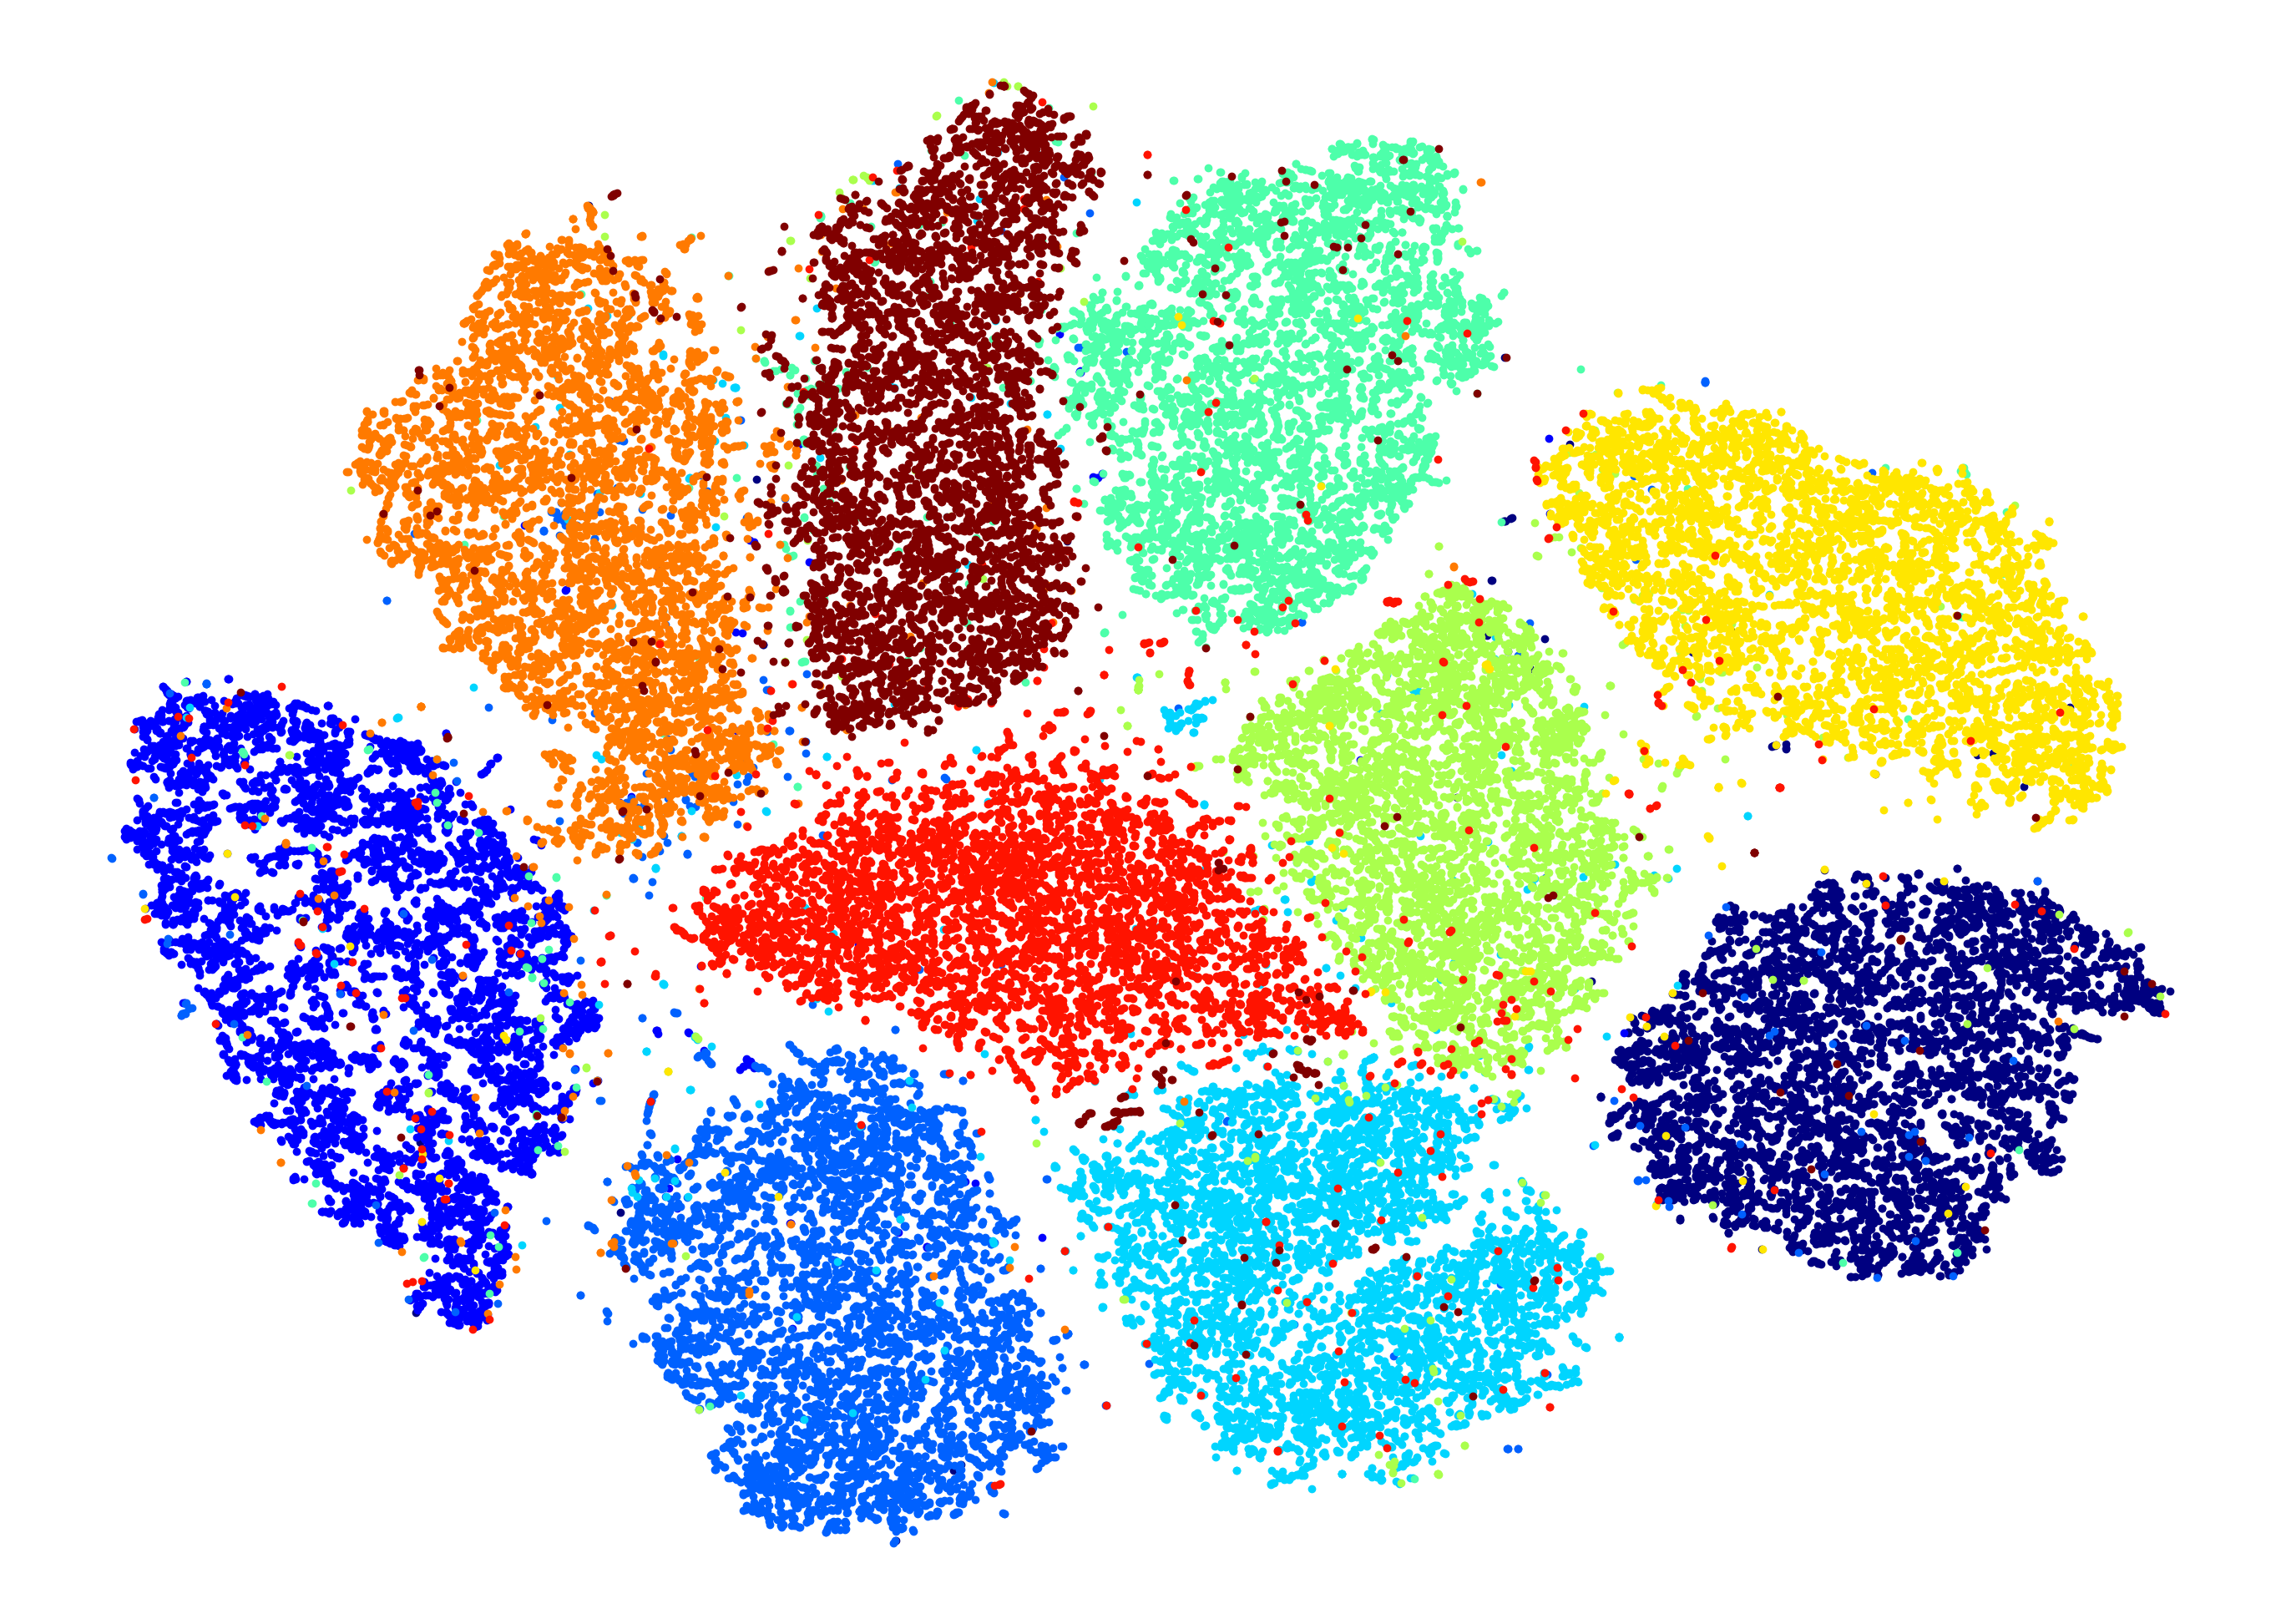

In [14]:
plot_digits(X_reduced,y)

This is much clearer than the previous visualzations,however we still see some scattered digits. But,100% perfection is not what we are aiming for here and we do get 10 large clusters for 10 different digits alongwith some small clusters as well. Also, if we compare the first plot and the last plot, we can see that we reduced the number of overlaps by a marginal amount.This is because of the Scaling.

If you have suggestions for improving this visualization further, do let me know.